In [1]:
#!/usr/bin/env python3 

In [44]:
# installing some necessary packages 
!pip install opencv-python 
!pip install matplotlib --user 
!pip install scikit-image 
!pip install ipyplot

In [1]:
# Author: Mbonu Chinedum 
# Description: This lecture is on open-source computer vision, and the 
# ------ source code used here are for testing purposes. 
# Date Created: 
# Date Modified: 

# Installing the necessary modules 
import os 
import cv2 
import ipyplot 
import numpy as np 
from skimage import io 
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt 
from IPython.display import Image

In [2]:
# specifying the path to the image file 
IMG_PATH = "images/grande1.jpg" 

# loading the image from the specified path 
img = cv2.imread(IMG_PATH) 
# img = io.imread(IMG_PATH)

# displaying the shape of the image 
print(f"Image shape: {img.shape} \n") 

# displaying the height and width of the image 
print(f"Image Height: {img.shape[1]}, Image Width: {img.shape[0]} \n")

# displaying the image channels 
print(f"Image Channel: {img.shape[2]} \n")

Image shape: (634, 634, 3) 

Image Height: 634, Image Width: 634 

Image Channel: 3 



<h3> Color Spaces </h3> 


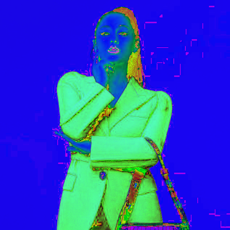


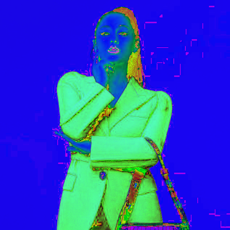


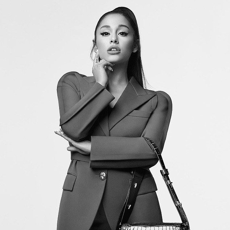


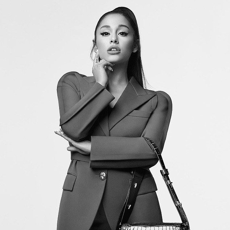

In [3]:
# converting into gray scale 
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# converting into hsv scale 
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# plotting the images color spaces 
ipyplot.plot_images([hsv_img], max_images=1, img_width=230)

#
ipyplot.plot_images([gray_img], max_images=1, img_width=230)

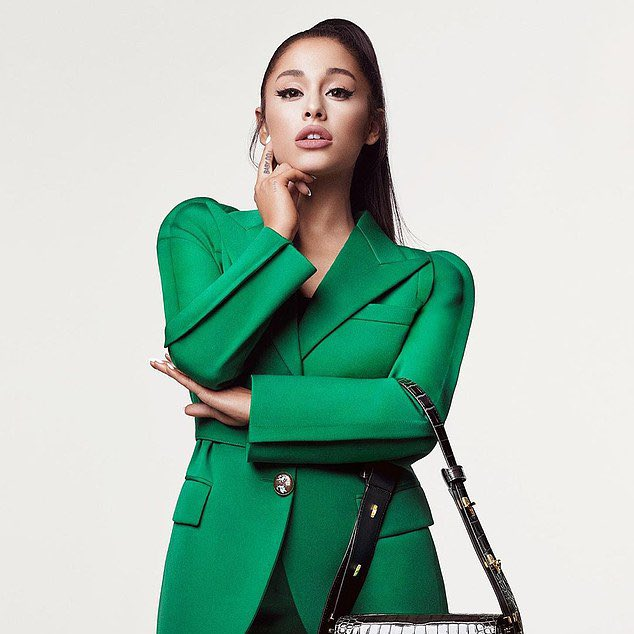

In [4]:
# Load image from local storage
Image(filename = "images/grande1.jpg", width = 300, height = 150)

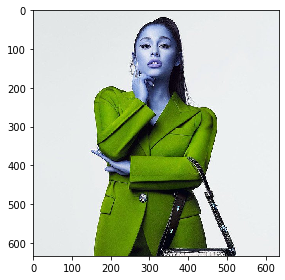

In [71]:
# resizing the image by 400x400 
# img = resize(img, (400, 400), anti_aliasing=True) 

# displaying the resized image 
io.imshow(img)
io.show() 

<h3> Splitting And Merging Channels </h3> 

In [72]:
# extracting the different color values for blue, green 
# and red.
(B, G, R) = cv2.split(img) 


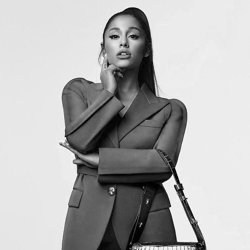
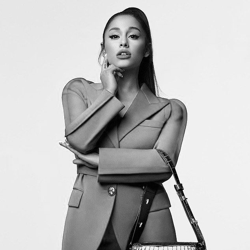
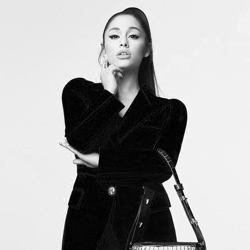


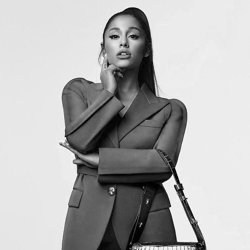
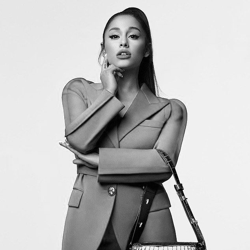
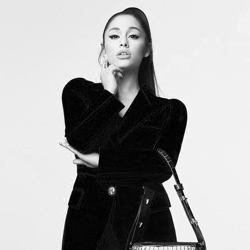

In [73]:
# plotting the images 
ipyplot.plot_images([B, G, R], max_images=3, img_width=250)

<h3> Thresholding </h3> 

<p> 
Thresholding the binarization of an image. In general, we seek to convert a grayscale image to a binary image,     where the pixels are either 0 or 255. <br> 
A simple thresholding example would be selecting a pixel value p, and then setting all pixel intensities less     than p to zero, and all pixel values greater than p to 255. In this way, we are able to create a binary           representation of the image. <br>
    
Normally, we use thresholding to focus on objects or areas of particular interest in an image. In the examples     in the sections below, we will empty our pockets and look at our spare change. Using thresholding methods,         we'll be able to find the coins in an image. 
    
    
    
</p> 

In [99]:
# setting the path to the image  
IMG_PATH = "images/grande2.jpg" 

# loading the image into memory 
image = cv2.imread(IMG_PATH) 

# converting the image into gray scale 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

# making the image blurry 
blur_image = cv2.GaussianBlur(image, (5, 5), 0)  # (5, 5) means the radius of the blur 


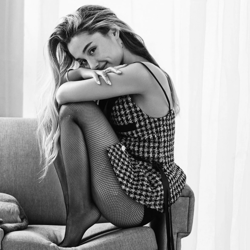


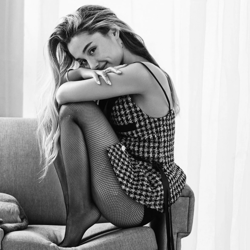


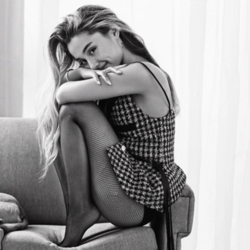


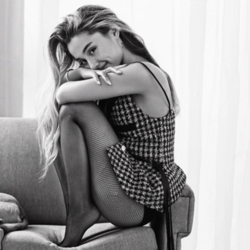

In [101]:
# plotting the images 
ipyplot.plot_images([gray_image], max_images=1, img_width=250)

# plotting the images 
ipyplot.plot_images([blur_image], max_images=1, img_width=250)

<h4> Explanation </h4> 
<p> 
After the image is blurred, we compute the thresholded image using <b>cv2.threshold </b> function. This method requires four arguments. The first is the grayscale image that we wish to threshold. We supply our blurred image here. <br> 
Then, we manually supply our T threshold value. We use a value of T = 155. <br> 

Our third argument is our maximum value applied during thresholding. Any pixel intensity p that is greater than T, is set to this value. In our example, any pixel value that is greater than 155 is set to 255. Any value that is less than 155 is set to zero. <br> 
    
Finally, we must provide a thresholding method. We use the <b>cv2.THRESH_BINARY</b> method, which indicates that pixel values p greater than T are set to the maximum value. <br> 
    
The <b>cv2.threshold </b> function returns two values. The first is T, the value we manually specified for thresholding. The second is our actual thresholding image. <br> 
    
We then show our thresholded image below, we can see that the image are now in black pixels and the white pixels are the background. <br> 
    
</p> 

In [102]:
# Applying threshold 
(T, thresh) = cv2.threshold(blur_image, 155, 255, cv2.THRESH_BINARY) 

# Getting the inverse of the threshold value as a pixel data or image 
(T, threshInv) = cv2.threshold(blur_image, 155, 255, cv2.THRESH_BINARY_INV) 


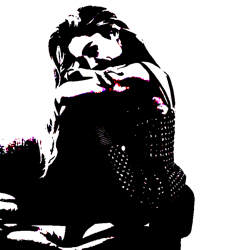


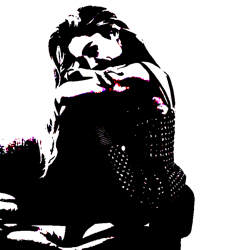


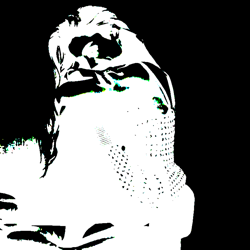


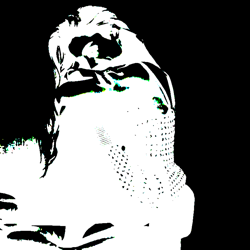

In [104]:
# plotting the images 
ipyplot.plot_images([thresh], max_images=1, img_width=250)

# plotting the images 
ipyplot.plot_images([threshInv], max_images=1, img_width=250)

<h3> Adaptive Thresholding </h3> 

<p> 
Applying adaptive thresholding to our blurred image using the <b>cv2.adaptiveThreshold</b> function on the first parameter we supply our maximum value of 255, similar to simple thresholding mentioned above. <br> 
    
The third argument is our method to compute the threshold for the current neighborhood of pixels. By supplying <b>cv2.ADAPTIVE_THRESH_MEAN_C</b> we indicate that we want to compute the mean of the neighborhood of pixels and treat it as our T value.  <br> 
    
Next, we need our thresholding method. Again, the description of this parameter is identical to the simple thresholding method mentioned above. We use <b>cv2.THRESH_BINARY_INV</b> to indicate that any pixel intensity greater than T in the neighborhood should be set to 255, otherwise it should be sets to 0. <br> 
    
The next parameter is our neighbourhood size. This integer value must be odd and indicates how large our neighborhood of pixels is going to be. We supply a value of 11, indicating that we are going to examine 11 x 11 pixel regions of the image, instead of trying to threshold the image globally, as in simple thresholding methods. <br> 
    
Finally, we supply a parameter simply called C. This value is an integer that is subtracted from the mean, allowing us to fine-tune our thresholding. We use C = 4 in the example below.  <br> 
The results of applying the mean weighted adaptive thresholding can be seen in the middle image. 
       
</p> 

In [111]:
# setting the path to the image  
IMG_PATH = "images/grande2.jpg" 

# loading the image  
image = cv2.imread(IMG_PATH)

# converting into gray scale value 
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# making the gray image blur 
blurred = cv2.GaussianBlur(gray_image, (5, 5), 0) 

# converting the image into a threshold image from the blurred value 
mean_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4) 

# converting the image into gaussian threshold value   
gaussian_thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3) 


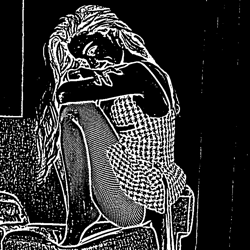


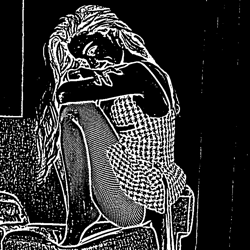


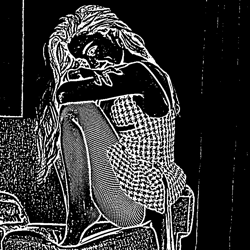


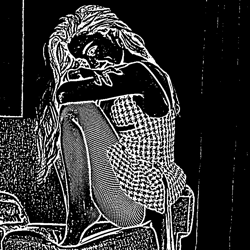

In [113]:
# plotting the images 
ipyplot.plot_images([mean_thresh], max_images=1, img_width=250)

# plotting the images 
ipyplot.plot_images([gaussian_thresh], max_images=1, img_width=250)

<h3> Gradients And Edge Detection </h3> 
<p> 
This chapter is primarily concerned with gradients and edge detection. Formally, edge detection embodies mathematicall methods to find points in an image where the brightness of pixel intensities changes distinctly. <br> 
The first thing we are going to do is find the "gradient" of the grayscale image, allowing us to find edge-like regions in the x and y direction. <br> 

We'll then apply Canny edge detection, a multi-stage process of noise reduction (blurring), finding the gradient of the image (utilizing the Sobel kernel in both the horizontal and vertical direction), non-maximum suppression, and hysteresis thresholding. <br>  
    
</p> 

In [26]:
# displaying the image using matplotlib 
# # setting the figure size firstly 
# plt.figure(figsize=(20, 7))
# plt.imshow(img)
# plt.show() 